In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from scipy.stats import sem
import matplotlib.cm as cm
from configs import engram_dir

In [2]:
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl2/'

# Helper functions for gathering data

In [3]:
def smooth(xs, ys, n=3):
    vals = np.copy(ys)
    smoothed = np.convolve(ys, np.ones(n)/n, mode='same')
    vals[1:-1] = smoothed[1:-1]
    return vals

In [4]:
def get_df(base, z, pfiles, net_yaml):
    data = {
        'valid_score': [], 'valid_steps':[], 'dims': [],
        'episode': [], 'model': [], 'z': [], 'step': [],
        'model_iter': []}
    for pickle_file in pfiles:
        with open(pickle_file, 'rb') as f:
            results = pickle.load(f)
        valid_score = results['valid_score']
        valid_steps = results['valid_steps_per_ep']
        episode = results['episode']
        model = results['model']
        step = results['step']
        for i in range(len(valid_score)):
            if valid_score[i] == None: continue
            data['valid_score'].append(valid_score[i])
            data['valid_steps'].append(valid_steps[i])
            data['dims'].append(z)
            data['episode'].append(episode[i])
            _model = model[i].split(base+'_')[-1]
            data['model'].append(_model)
            data['z'].append(z)
            data['step'].append(step[i])
            data['model_iter'].append(results['model_iter'][i])
    df = pd.DataFrame(data)
    return df

In [5]:
def find_model_directories(directory_path, model):
    all_files_dirs = os.listdir(directory_path)
    pattern = f'\\b{model}(\\d*)\\b'  # Using word boundaries to ensure complete matches
    matches = [re.search(pattern, item) for item in all_files_dirs]
    
    # Filter out None values (i.e., items that didn't match) and return a list of tuples
    return [(match.group(0), int(match.group(1)) if match.group(1) else None) for match in matches if match]

In [6]:
os.listdir(engram_dir + 'pickles')

['gridworld_discount0.5_eps1.0_dm_dim7',
 'gridworld_discount0.5_eps1.0_dm_dim10',
 'gridworld_discount0.7_eps1.0_dm_dim7_shuffobs',
 '.DS_Store',
 'gridworld_discount0.7_eps1.0_dm_dim10_shuffobs',
 'gridworld_discount0.9_eps1.0_dm_dim7',
 'gridworld_discount0.7_eps1.0_dm_dim7',
 'gridworld_discount0.5_eps1.0_dm_dim7_shuffobs',
 'gridworld_discount0.9_eps1.0_dm_dim7_shuffobs',
 'gridworld_discount0.9_eps1.0_dm_dim10',
 'gridworld_discount0.9_eps1.0_dm_dim10_shuffobs',
 'gridworld_discount0.5_eps1.0_dm_dim10_shuffobs',
 'gridworld_discount0.7_eps1.0_dm_dim10']

# Model Free
We choose $\gamma=0.9$, $\eta=1\times10^0$

#### $\gamma=0.5$, $|z|=7$

In [7]:
base = 'gridworld_discount0.5_eps1.0'
net_yaml = 'dm'
z = 7

In [8]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

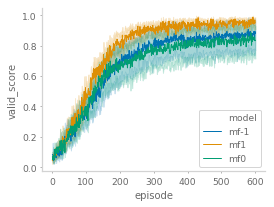

In [9]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('mf')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.7$, $|z|=7$

In [10]:
base = 'gridworld_discount0.7_eps1.0'
net_yaml = 'dm'
z = 7

In [11]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

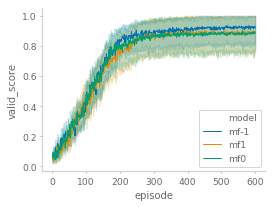

In [12]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('mf')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.9$, $|z|=7$

In [13]:
base = 'gridworld_discount0.9_eps1.0'
net_yaml = 'dm'
z = 7

In [14]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

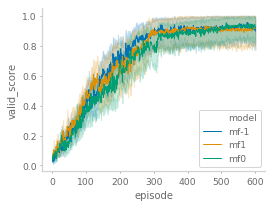

In [15]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('mf')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.9$, $|z|=10$

In [16]:
base = 'gridworld_discount0.9_eps1.0'
net_yaml = 'dm'
z = 10

In [17]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

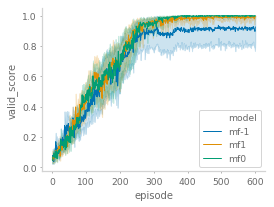

In [18]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('mf')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

# Negative Sampling
We choose $\gamma=$, $\eta=1\times 10^{-2}$

#### $\gamma=0.5$, $|z|=7$

In [19]:
base = 'gridworld_discount0.5_eps1.0'
net_yaml = 'dm'
z = 7

In [20]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

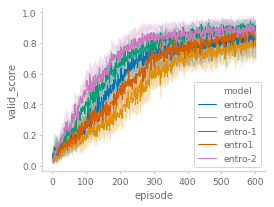

In [21]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('entro')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.7$, $|z|=7$

In [22]:
base = 'gridworld_discount0.7_eps1.0'
net_yaml = 'dm'
z = 7

In [23]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

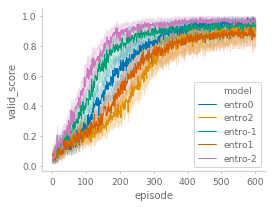

In [24]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('entro')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.9$, $|z|=7$

In [25]:
base = 'gridworld_discount0.9_eps1.0'
net_yaml = 'dm'
z = 7

In [26]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

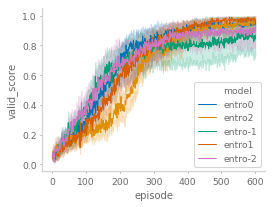

In [27]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('entro')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.7$, $|z|=10$

In [96]:
base = 'gridworld_discount0.7_eps1.0'
net_yaml = 'dm'
z = 10

In [97]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

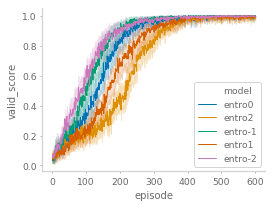

In [98]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('entro')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.9$, $|z|=10$

In [28]:
base = 'gridworld_discount0.9_eps1.0'
net_yaml = 'dm'
z = 10

In [29]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

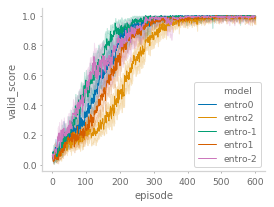

In [30]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('entro')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

# Positive Sampling, g0
We choose $\gamma=0.9$, $\eta=1\times 10^{-2}$ for $\mathcal{L}_+$ and $\eta=1\times 10^{-2}$ for $\mathcal{L}_-$

#### $\gamma=0.5$, $|z|=7$

In [31]:
base = 'gridworld_discount0.5_eps1.0'
net_yaml = 'dm'
z = 7

In [32]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

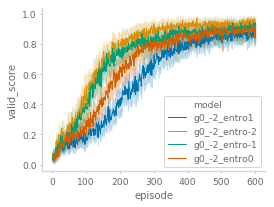

In [33]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.7$, $|z|=7$

In [34]:
base = 'gridworld_discount0.7_eps1.0'
net_yaml = 'dm'
z = 7

In [35]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

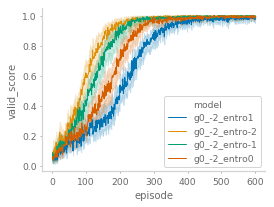

In [36]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.9$, $|z|=7$

In [37]:
base = 'gridworld_discount0.9_eps1.0'
net_yaml = 'dm'
z = 7

In [38]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

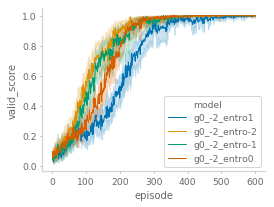

In [39]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.9$, $|z|=10$

In [40]:
base = 'gridworld_discount0.9_eps1.0'
net_yaml = 'dm'
z = 10

In [41]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

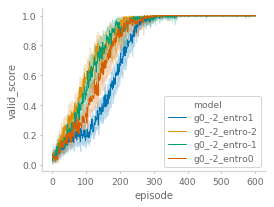

In [42]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

# Positive Sampling, g0.25
We choose $\gamma=0.9$, $\eta=1\times 10^{-2}$ for $\mathcal{L}_+$ and $\eta=1\times 10^{-2}$ for $\mathcal{L}_-$

#### $\gamma=0.5$, $|z|=7$

In [43]:
base = 'gridworld_discount0.5_eps1.0'
net_yaml = 'dm'
z = 7

In [44]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

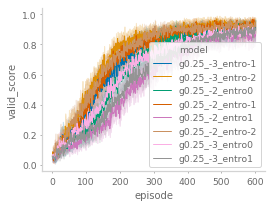

In [45]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0.25_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.7$, $|z|=7$

In [46]:
base = 'gridworld_discount0.7_eps1.0'
net_yaml = 'dm'
z = 7

In [47]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

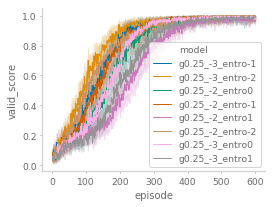

In [48]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0.25_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.9$, $|z|=7$

In [49]:
base = 'gridworld_discount0.9_eps1.0'
net_yaml = 'dm'
z = 7

In [50]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

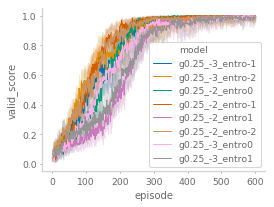

In [51]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0.25_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.9$, $|z|=10$

In [52]:
base = 'gridworld_discount0.9_eps1.0'
net_yaml = 'dm'
z = 10

In [53]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

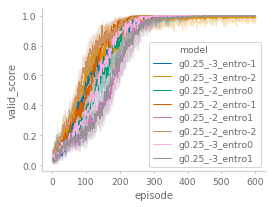

In [54]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0.25_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

# Positive Sampling, g0.5
We choose $\gamma=0.9$, $\eta=1\times 10^{-3}$ for $\mathcal{L}_+$ and $\eta=1\times 10^{-2}$ for $\mathcal{L}_-$

#### $\gamma=0.5$, $|z|=7$

In [55]:
base = 'gridworld_discount0.5_eps1.0'
net_yaml = 'dm'
z = 7

In [56]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

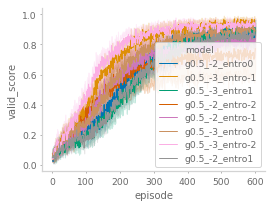

In [57]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0.5_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.7$, $|z|=7$

In [58]:
base = 'gridworld_discount0.7_eps1.0'
net_yaml = 'dm'
z = 7

In [59]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

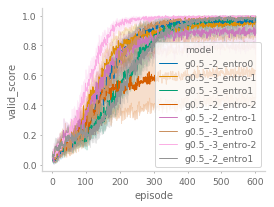

In [60]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0.5_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.9$, $|z|=7$

In [61]:
base = 'gridworld_discount0.9_eps1.0'
net_yaml = 'dm'
z = 7

In [62]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

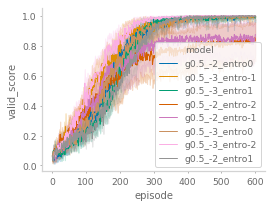

In [63]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0.5_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.7$, $|z|=10$

In [105]:
base = 'gridworld_discount0.7_eps1.0'
net_yaml = 'dm'
z = 10

In [106]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

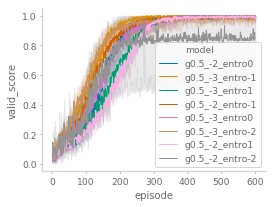

In [107]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0.5_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.9$, $|z|=10$

In [64]:
base = 'gridworld_discount0.9_eps1.0'
net_yaml = 'dm'
z = 10

In [65]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

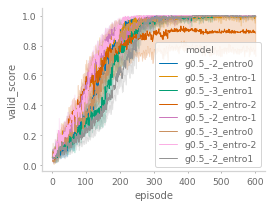

In [66]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0.5_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

# Positive Sampling, g0.8
We choose $\gamma=0.9$, $\eta=1\times 10^{-4}$ for $\mathcal{L}_+$ and $\eta=1\times 10^{-2}$ for $\mathcal{L}_-$

#### $\gamma=0.5$, $|z|=7$

In [67]:
base = 'gridworld_discount0.5_eps1.0'
net_yaml = 'dm'
z = 7

In [68]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

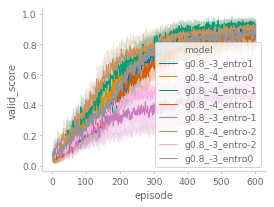

In [69]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0.8_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.7$, $|z|=7$

In [70]:
base = 'gridworld_discount0.7_eps1.0'
net_yaml = 'dm'
z = 7

In [71]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

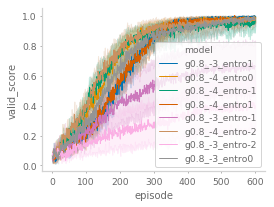

In [72]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0.8_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.9$, $|z|=7$

In [73]:
base = 'gridworld_discount0.9_eps1.0'
net_yaml = 'dm'
z = 7

In [74]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

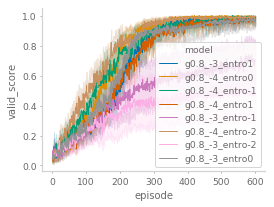

In [75]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0.8_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.7$, $|z|=10$

In [76]:
base = 'gridworld_discount0.7_eps1.0'
net_yaml = 'dm'
z = 10

In [77]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

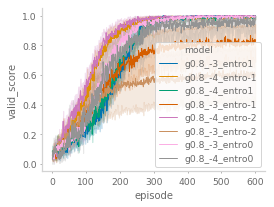

In [78]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0.8_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.9$, $|z|=10$

In [79]:
base = 'gridworld_discount0.9_eps1.0'
net_yaml = 'dm'
z = 10

In [80]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

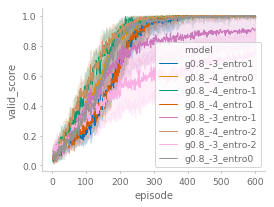

In [81]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('g0.8_')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

# IQN
We choose $\gamma=0.7$, $\eta=1\times 10^{1}$

#### $\gamma=0.5$, $|z|=7$

In [82]:
base = 'gridworld_discount0.5_eps1.0'
net_yaml = 'dm'
z = 7

In [83]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

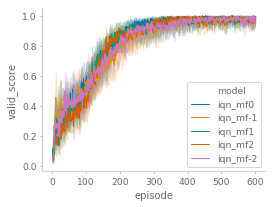

In [84]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('iqn')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.7$, $|z|=7$

In [85]:
base = 'gridworld_discount0.7_eps1.0'
net_yaml = 'dm'
z = 7

In [86]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

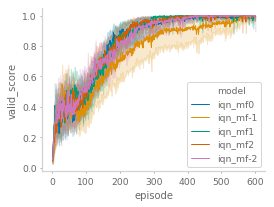

In [87]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('iqn')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.9$, $|z|=7$

In [102]:
base = 'gridworld_discount0.9_eps1.0'
net_yaml = 'dm'
z = 7

In [103]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

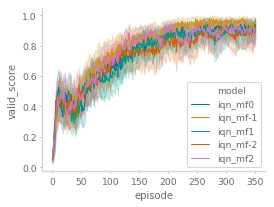

In [104]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('iqn')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.7$, $|z|=10$

In [90]:
base = 'gridworld_discount0.7_eps1.0'
net_yaml = 'dm'
z = 10

In [91]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

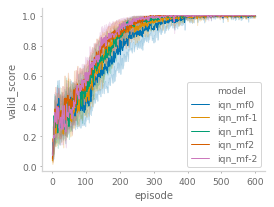

In [92]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('iqn')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()

#### $\gamma=0.9$, $|z|=10$

In [93]:
base = 'gridworld_discount0.9_eps1.0'
net_yaml = 'dm'
z = 10

In [94]:
pfiles = []

pickle_dir = f'{engram_dir}pickles/{base}_{net_yaml}_dim{z}_shuffobs/'
for pfile in os.listdir(pickle_dir):
    if pfile.endswith('.p'):
        pfiles.append(f'{pickle_dir}{pfile}')
df = get_df(base, z, pfiles, net_yaml)

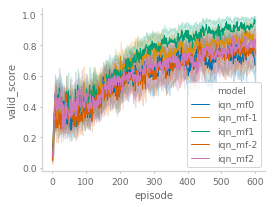

In [95]:
fig, ax = plt.subplots(figsize=(4,3))
_df = df.copy()
_df = df[df['model'].str.startswith('iqn')]
sns.lineplot(x='episode', y='valid_score', hue='model', data=_df)
plt.show()